In [1]:
from pyforest import * 

In [2]:
import turtle
import pandas as pd


data=pd.read_csv("Diabetes.csv", encoding='unicode_escape')

In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

<Axes: xlabel='max_glu_serum'>

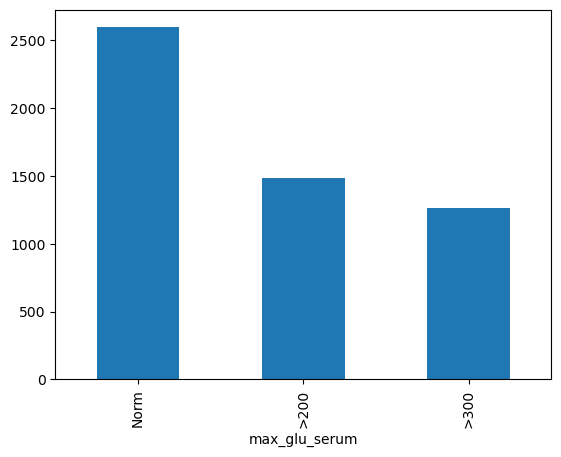

In [7]:
data.max_glu_serum.value_counts().plot(kind = 'bar' )

<Axes: xlabel='A1Cresult'>

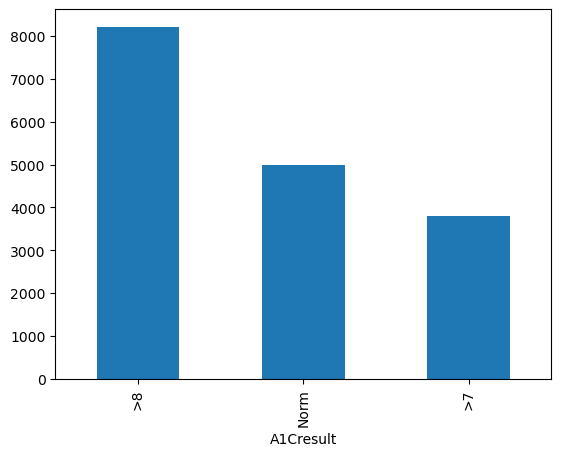

In [8]:

data.A1Cresult.value_counts().plot(kind = 'bar' )

<Axes: xlabel='change'>

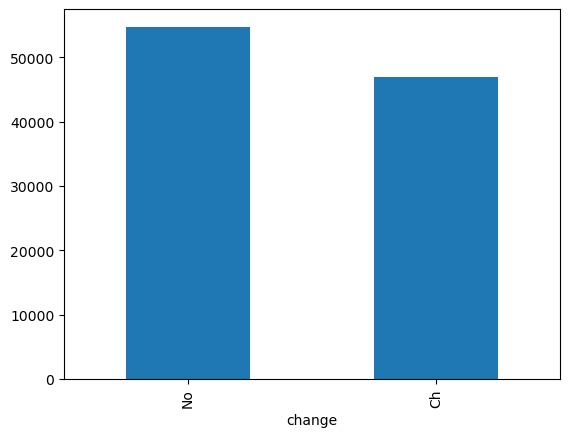

In [9]:
data.change.value_counts().plot(kind = 'bar' )

<Axes: xlabel='diabetesMed'>

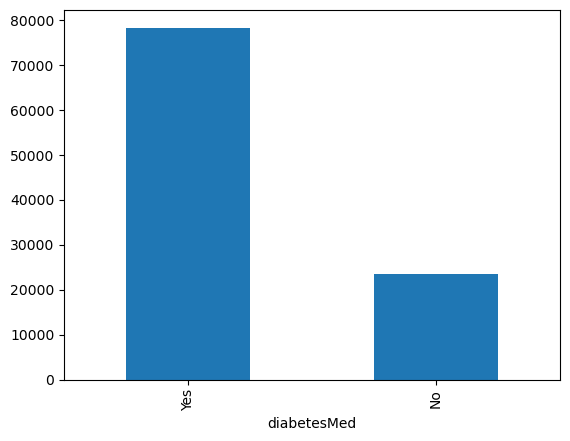

In [10]:
data.diabetesMed.value_counts().plot(kind = 'bar' )

<Axes: xlabel='readmitted'>

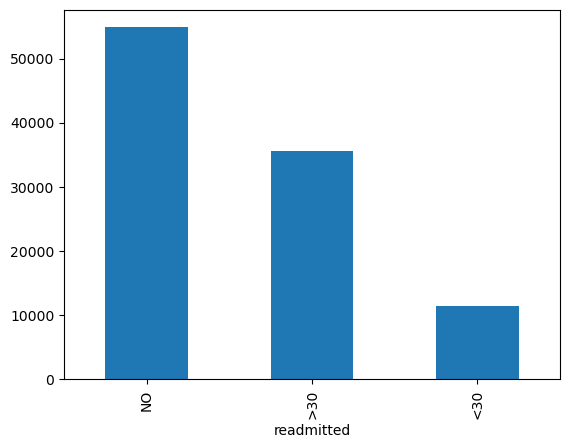

In [11]:
data.readmitted.value_counts().plot(kind = 'bar' )

<Axes: xlabel='age'>

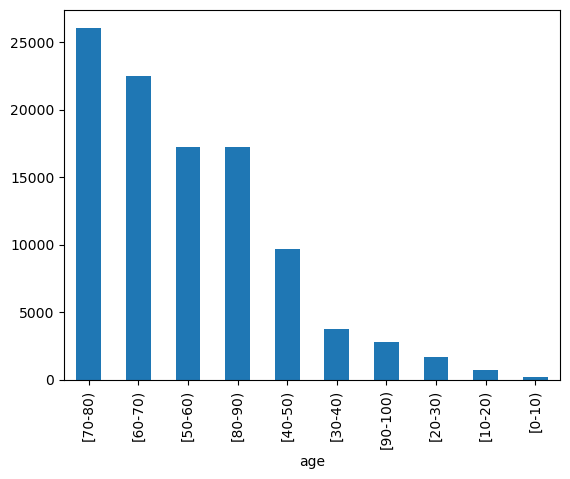

In [12]:
data.age.value_counts().plot(kind = 'bar')

# Filtering patients with diabetes medication

In [13]:
data=data[data.diabetesMed=='Yes']
data.shape

(78363, 50)

# Filtering patients that weren't readmitted

In [14]:
data=data[data.readmitted=='NO']
data.shape

(40934, 50)

# Excluding patients who are no more

In [15]:
data=data[~data.discharge_disposition_id.isin([11,13,14,19,20])]
data.shape

(39355, 50)

In [16]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
data=data.drop(['readmitted','diabetesMed'],axis=1)

# Handling Missing Values

In [18]:
data.replace('?',np.NAN,inplace=True) # type: ignore
#replacing tha '?' with null.

<IPython.core.display.Javascript object>

In [19]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         1227
gender                          0
age                             0
weight                      38518
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  14833
medical_specialty           18274
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          7
diag_2                        212
diag_3                        761
number_diagnoses                0
max_glu_serum               37510
A1Cresult                   31668
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [20]:
# !pip install missingpy

In [21]:
# from missingpy import KNNImputer
# imputer = KNNImputer(missing_values="NaN", n_neighbors=5, weights="distance", 
#                  metric="masked_euclidean", row_max_missing=0.5, 
#                  col_max_missing=0.98, copy=True)
# xnew=data.weight.values.reshape(-1,1)
# X_imputed = imputer.fit_transform(xnew)

In [22]:
data.isnull().sum()[data.isnull().sum()>0]

race                  1227
weight               38518
payer_code           14833
medical_specialty    18274
diag_1                   7
diag_2                 212
diag_3                 761
max_glu_serum        37510
A1Cresult            31668
dtype: int64

Since Weight, payer code and medical speciality have more than 50% missing values, it's safe to drop these columns

In [23]:
data = data.drop(['medical_specialty','payer_code','weight'],axis=1)

Replacing the missing values in 'race' with the mode.

In [24]:
data['race'].fillna(data['race'].mode()[0], inplace=True)

In [25]:
data.isnull().sum()[data.isnull().sum()>0]

diag_1               7
diag_2             212
diag_3             761
max_glu_serum    37510
A1Cresult        31668
dtype: int64

In [26]:
data.shape

(39355, 45)

In [27]:
Medication = data[['encounter_id','metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']].copy()

In [28]:
Medication.head()

,encounter_id,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
2,64410,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No
3,500364,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,16680,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,55842,Steady,No,No,No,Steady,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
8,12522,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Steady,No,No,No,No,No


# Feature Engineering

In [29]:
Medication=Medication.replace(['No','Steady','Up','Down'],[0,1,1,1])
Medication.set_index('encounter_id',inplace=True) #setting index as encounter_id

In [30]:
Medication.sum(axis=1).value_counts()

1    23080
2    11397
3     4108
4      730
5       39
6        1
Name: count, dtype: int64

In [31]:
withInsulin = Medication[Medication['insulin']==1].sum(axis = 1).replace([1,2,3,4,5,6],['i','io','io','io','io','io'])

In [32]:
withoutInsulin=Medication[Medication['insulin']==0].sum(axis=1).replace([0,1,2,3,4,5,6],['no med','other','other','other','other','other','other'])

In [33]:
Medication=pd.concat([withInsulin,withoutInsulin])
Medication = pd.DataFrame({'Medications':Medication})
Medication.head()

,Medications
encounter_id,
500364,i
16680,io
55842,io
12522,io
15738,io


In [34]:
# Medication=Medication.replace('insulin',0)
# Medication=Medication.replace('i+o',1)

In [35]:
Medication.head()

,Medications
encounter_id,
500364,i
16680,io
55842,io
12522,io
15738,io


In [36]:
data=data.join(Medication,on='encounter_id') #adding the column 'Medication' to the data.

In [37]:
data = data.drop(['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis=1)

In [38]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,Medications
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,0,1,648,250,V27,6,NaN,NaN,No,other
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,0,0,8,250.43,403,7,NaN,NaN,Ch,i
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,0,0,197,157,250,5,NaN,NaN,Ch,io
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,0,0,414,411,V45,7,NaN,NaN,Ch,io
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,0,0,398,427,38,8,NaN,NaN,Ch,io


<Axes: xlabel='Medications'>

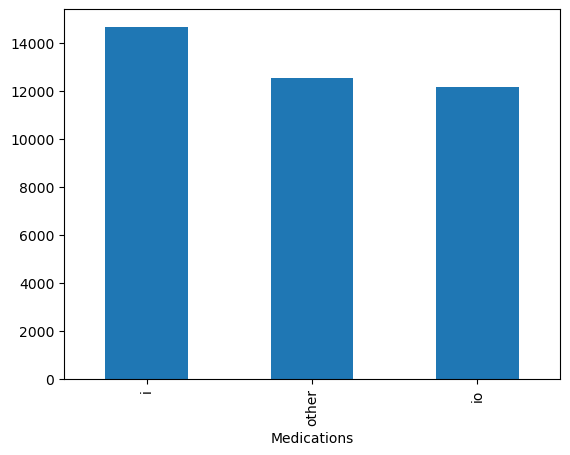

In [39]:
data['Medications'].value_counts().plot(kind='bar')

# Choosing the records with insulin and insulin + other drugs as per the problem statement.

In [40]:
data=data[data.Medications!='other']
data.shape

(26820, 23)

In [41]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'Medications'],
      dtype='object')

In [42]:
data = pd.get_dummies(data, columns=['race', 'gender','max_glu_serum', 'A1Cresult', 'change'])

In [43]:
data.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,gender_Female,gender_Male,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,change_Ch,change_No
3,500364,82442376,[30-40),1,1,7,2,44,1,16,...,False,True,False,False,False,False,False,False,True,False
4,16680,42519267,[40-50),1,1,7,1,51,0,8,...,False,True,False,False,False,False,False,False,True,False
6,55842,84259809,[60-70),3,1,2,4,70,1,21,...,False,True,False,False,False,False,False,False,True,False
8,12522,48330783,[80-90),2,1,4,13,68,2,28,...,True,False,False,False,False,False,False,False,True,False
9,15738,63555939,[90-100),3,3,4,12,33,3,18,...,True,False,False,False,False,False,False,False,True,False


In [44]:
#Replacing age range with the average age
data['age']=data['age'].replace('[0-10)',5)
data['age']=data['age'].replace('[10-20)',15)
data['age']=data['age'].replace('[20-30)',25)
data['age']=data['age'].replace('[30-40)',35)
data['age']=data['age'].replace('[40-50)',45)
data['age']=data['age'].replace('[50-60)',55)
data['age']=data['age'].replace('[60-70)',65)
data['age']=data['age'].replace('[70-80)',75)
data['age']=data['age'].replace('[80-90)',85)
data['age']=data['age'].replace('[90-100)',95)
data['age'].value_counts()

age
75    6171
65    5982
55    4986
85    3834
45    2860
35    1226
95     677
25     630
15     348
5      106
Name: count, dtype: int64

In [45]:
data.age.value_counts()

age
75    6171
65    5982
55    4986
85    3834
45    2860
35    1226
95     677
25     630
15     348
5      106
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

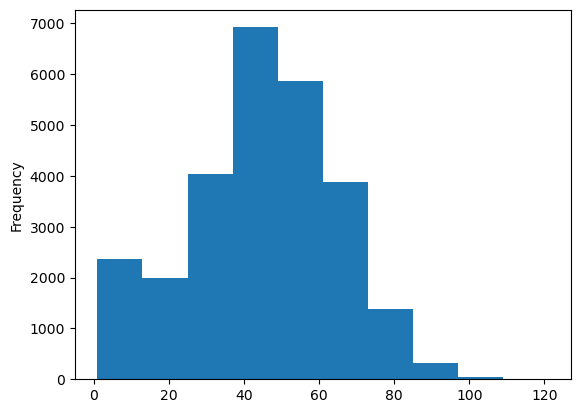

In [46]:
data.num_lab_procedures.plot(kind='hist')

c:\Users\manoh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


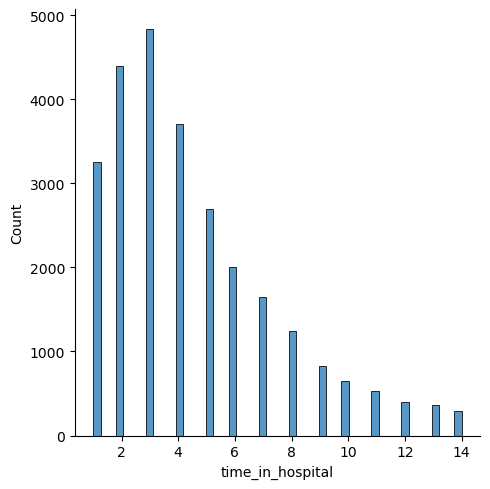

In [47]:

import seaborn as sns # type: ignore
sns.displot(data.time_in_hospital)

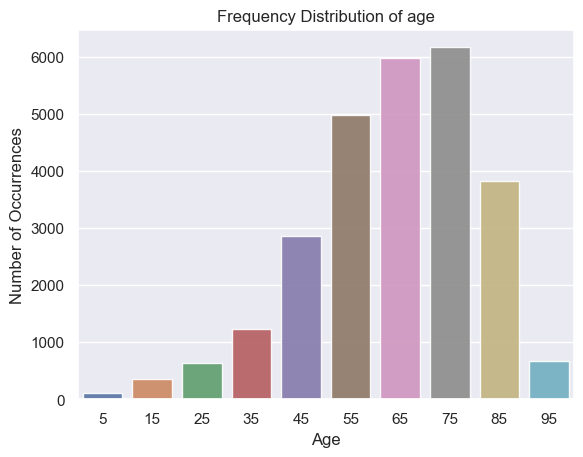

In [48]:
import matplotlib.pyplot as plt # type: ignore
age_count = data['age'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=age_count.index, y=age_count.values, alpha=0.9)
plt.title('Frequency Distribution of age')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

<Axes: xlabel='age', ylabel='count'>

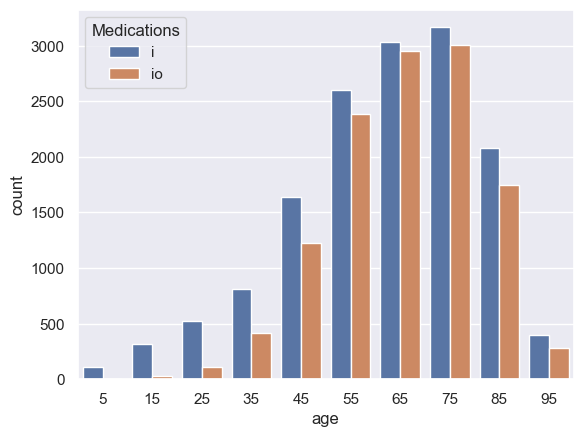

In [49]:
sns.countplot(data=data, x='age', hue='Medications')

Since the columns diag_1,diag_2 and diag_3 contain information about codes of different treatments given to our patients, these columns do not contribute much to our model.

In [50]:
data = data.drop(['diag_1','diag_2','diag_3'],axis = 1)

In [51]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
Medications                 0
race_AfricanAmerican        0
race_Asian                  0
race_Caucasian              0
race_Hispanic               0
race_Other                  0
gender_Female               0
gender_Male                 0
max_glu_serum_>200          0
max_glu_serum_>300          0
max_glu_serum_Norm          0
A1Cresult_>7                0
A1Cresult_>8                0
A1Cresult_Norm              0
change_Ch                   0
change_No                   0
dtype: int64

In [52]:
print('Treatment with Insulin:', round(data['Medications'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Treatment with  Insulin and a combination of drugs:', round(data['Medications'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Treatment with Insulin: 54.72 % of the dataset
Treatment with  Insulin and a combination of drugs: 45.28 % of the dataset


Since the data is not extremely imbalanced, there is no need for balancing techiques.

# Chi square test for dependence (for feature selection)

In [53]:
### import pandas as pd
import numpy as np # type: ignore
import scipy.stats as stats # type: ignore
from scipy.stats import chi2_contingency # type: ignore

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is an IMPORTANT feature".format(colX)
        else:
            result="{0} is NOT an important predictor".format(colX)

        print(result)
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


In [54]:
cT = ChiSquare(data)

#Feature Selection
testColumns = ['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Female', 'gender_Male',
       'max_glu_serum_>200', 'max_glu_serum_>300', 
       'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 
       'A1Cresult_Norm', 'change_Ch', 'change_No']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Medications" )

encounter_id is NOT an important predictor
patient_nbr is NOT an important predictor
age is an IMPORTANT feature
admission_type_id is an IMPORTANT feature
discharge_disposition_id is an IMPORTANT feature
admission_source_id is an IMPORTANT feature
time_in_hospital is an IMPORTANT feature
num_lab_procedures is NOT an important predictor
num_procedures is an IMPORTANT feature
num_medications is an IMPORTANT feature
number_outpatient is NOT an important predictor
number_emergency is NOT an important predictor
number_inpatient is an IMPORTANT feature
number_diagnoses is an IMPORTANT feature
race_AfricanAmerican is an IMPORTANT feature
race_Asian is NOT an important predictor
race_Caucasian is an IMPORTANT feature
race_Hispanic is an IMPORTANT feature
race_Other is NOT an important predictor
gender_Female is an IMPORTANT feature
gender_Male is an IMPORTANT feature
max_glu_serum_>200 is NOT an important predictor
max_glu_serum_>300 is an IMPORTANT feature
max_glu_serum_Norm is an IMPORTANT f

In [55]:
data['Medications'] = data['Medications'] .replace('i', 0)
data['Medications'] = data['Medications'] .replace('io', 1)

In [56]:
#model
from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score,confusion_matrix # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

In [57]:
data.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,gender_Female,gender_Male,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,change_Ch,change_No
3,500364,82442376,35,1,1,7,2,44,1,16,...,False,True,False,False,False,False,False,False,True,False
4,16680,42519267,45,1,1,7,1,51,0,8,...,False,True,False,False,False,False,False,False,True,False
6,55842,84259809,65,3,1,2,4,70,1,21,...,False,True,False,False,False,False,False,False,True,False
8,12522,48330783,85,2,1,4,13,68,2,28,...,True,False,False,False,False,False,False,False,True,False
9,15738,63555939,95,3,3,4,12,33,3,18,...,True,False,False,False,False,False,False,False,True,False


In [58]:
X = data.drop(['encounter_id','patient_nbr','num_lab_procedures','number_outpatient','number_emergency',
                      'race_Asian','race_Other','max_glu_serum_>200','A1Cresult_>8','A1Cresult_Norm','Medications'],axis=1)
Y = data['Medications']
print(X.shape)
print(Y.shape)

(26820, 19)
(26820,)


In [59]:
# Assuming you have loaded your dataset into a variable called 'data'

# Assuming your features are in columns 0 to n-1 and the target is in the nth column
X = data.iloc[:, :-1]  # Features
Y = data.iloc[:, -1]   # Target

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [61]:
# x[['race_AfricanAmerican','race_Caucasian','race_Hispanic','gender_Female','gender_Male','max_glu_serum_>300','max_glu_serum_None','max_glu_serum_Norm','A1Cresult_>7','A1Cresult_None','change_Ch','change_No']].head()

In [62]:
# x['change_No'].unique()

In [63]:
# rf=RandomForestClassifier()
# rf.fit(X_train,y_train)

In [64]:
# features=pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=["Features_wt"]).head(10)

In [65]:
# features.sort_values(by="Features_wt",ascending=True).plot(kind="barh")

Applying model on selected features.


In [66]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
Train_Score_lr = lr.score(X_train,y_train)
Test_Score_lr = accuracy_score(y_test,y_pred_lr)


print('Training Accuracy is:',Train_Score_lr)
print('Testing Accuracy is:',Test_Score_lr)
print(classification_report(y_test,y_pred_lr))

Training Accuracy is: 0.6878129327793757
Testing Accuracy is: 0.7007208550832712
              precision    recall  f1-score   support

       False       0.70      1.00      0.82      5638
        True       0.00      0.00      0.00      2408

    accuracy                           0.70      8046
   macro avg       0.35      0.50      0.41      8046
weighted avg       0.49      0.70      0.58      8046



c:\Users\manoh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manoh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manoh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]

In [68]:
from sklearn.preprocessing import binarize
import numpy as np

# Example y_pred_prob array
y_pred_prob = np.array([0.1, 0.4, 0.35, 0.8])

# Ensure y_pred_prob is 2D
y_pred_prob_2d = y_pred_prob.reshape(1, -1)

# Binarize with the correct threshold parameter
y_pred_class = binarize(y_pred_prob_2d, threshold=0.659)[0]

print(y_pred_class)


[0. 0. 0. 1.]


In [69]:
from sklearn.preprocessing import binarize
from sklearn import metrics
y_pred_class = binarize([y_pred_prob], threshold= 0.659)[0]

In [70]:
y_pred_prob[0:10]

array([0.1 , 0.4 , 0.35, 0.8 ])

In [71]:
from sklearn.preprocessing import binarize
from sklearn import metrics
import numpy as np

# Example y_pred_prob and y_test (ensure they have the same length)
y_test = np.array([0, 0, 1, 1])
y_pred_prob = np.array([0.1, 0.4, 0.35, 0.8])

# Ensure y_pred_prob is 2D
y_pred_prob_2d = y_pred_prob.reshape(1, -1)

# Binarize with the correct threshold parameter
threshold = 0.659
y_pred_class = binarize(y_pred_prob_2d, threshold=threshold)[0]

# Compute the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2 0]
 [1 1]]


In [72]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[2 0]
 [1 1]]


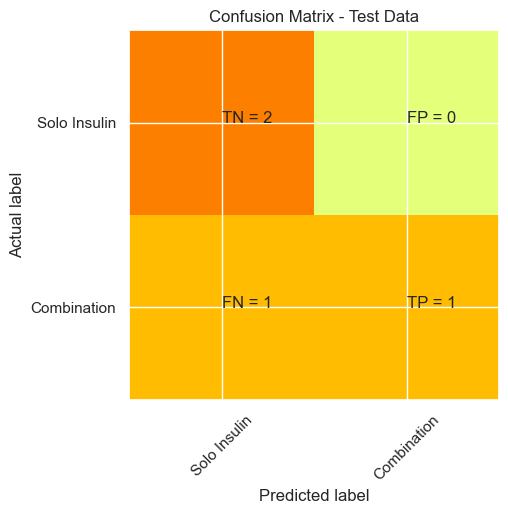

In [73]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, y_pred_class)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Solo Insulin','Combination']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

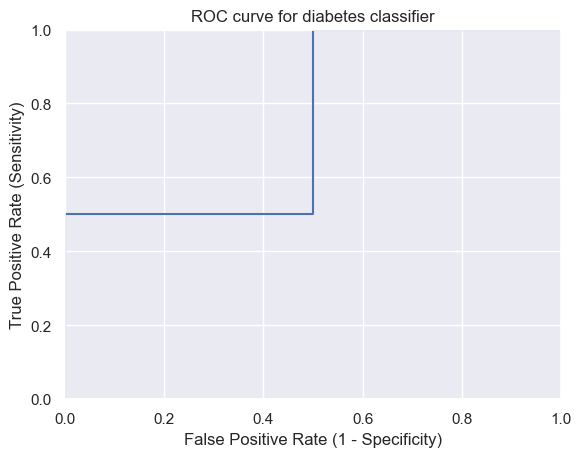

In [74]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [75]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [76]:
evaluate_threshold(0.62)

Sensitivity: 0.5
Specificity: 1.0


In [77]:
# from sklearn.ensemble import BaggingClassifier

In [78]:
# bgc = BaggingClassifier()
# bgc = bgc.fit(X_train, y_train)

In [79]:
# y_pred_bgc=bgc.predict(X_test)
# Train_Score_bgc = bgc.score(X_train,y_train)
# Test_Score_bgc = accuracy_score(y_test,y_pred_bgc)


# print('Training Accuracy is:',Train_Score_bgc)
# print('Testing Accuracy is:',Test_Score_bgc)
# print(classification_report(y_test,y_pred_bgc))

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Example dataset (replace with your actual dataset)
X, y = np.random.rand(1000, 10), np.random.randint(0, 2, size=1000)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test)

# Ensure consistency in sample numbers
if len(y_test) != len(y_pred_dt):
    raise ValueError(f"Mismatch in number of samples: y_test has {len(y_test)} samples, but y_pred_dt has {len(y_pred_dt)} samples.")

# Calculate accuracy
Train_Score_dt = dt.score(X_train, y_train)
Test_Score_dt = accuracy_score(y_test, y_pred_dt)

print('Training Accuracy :', Train_Score_dt)
print('Testing Accuracy :', Test_Score_dt)


Training Accuracy : 1.0
Testing Accuracy : 0.42


In [81]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
Train_Score_dt = dt.score(X_train,y_train)
Test_Score_dt = accuracy_score(y_test,y_pred_dt)

print('Training Accuracy :',Train_Score_dt)
print('Testing Accuracy :',Test_Score_dt)
print(classification_report(y_test,y_pred_dt))

Training Accuracy : 1.0
Testing Accuracy : 0.45
              precision    recall  f1-score   support

           0       0.45      0.41      0.43       101
           1       0.45      0.49      0.47        99

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200



Decision tree is giving us a highly overfit model

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
y_pred_rf=rf.predict(X_test)
Train_Score_rf = rf.score(X_train,y_train)
Test_Score_rf = accuracy_score(y_test,y_pred_rf)


print('Training Accuracy is:',Train_Score_rf)
print('Testing Accuracy is:',Test_Score_rf)
print(classification_report(y_test,y_pred_rf))

Training Accuracy is: 1.0
Testing Accuracy is: 0.4
              precision    recall  f1-score   support

           0       0.34      0.21      0.26       101
           1       0.42      0.60      0.50        99

    accuracy                           0.40       200
   macro avg       0.38      0.40      0.38       200
weighted avg       0.38      0.40      0.38       200



Grid Search CV for n estimators

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
from sklearn.ensemble import RandomForestClassifier # type: ignore
n_estimator = np.arange(1,40)
model = RandomForestClassifier()
grid = GridSearchCV(cv=10,estimator=model, param_grid=dict(n_estimators=n_estimator))
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})
0.5425
34


In [87]:
rf2=RandomForestClassifier(n_estimators=21)
rf2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=21)

In [88]:
y_pred_rf=rf2.predict(X_test)
Train_Score_rf = rf2.score(X_train,y_train)
Test_Score_rf = accuracy_score(y_test,y_pred_rf)


print('Training Accuracy is:',Train_Score_rf)
print('Testing Accuracy is:',Test_Score_rf)
print(classification_report(y_test,y_pred_rf))

Training Accuracy is: 1.0
Testing Accuracy is: 0.45
              precision    recall  f1-score   support

           0       0.44      0.34      0.38       101
           1       0.46      0.57      0.50        99

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.44       200
weighted avg       0.45      0.45      0.44       200



Parameter tuning for decision tree

In [89]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy')

In [90]:
tree.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [91]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=50,min_samples_split=50)
dt.fit(X_train,y_train)
y_pred_tdt=dt.predict(X_test)
Train_Score_tdt = dt.score(X_train,y_train)
Test_Score_tdt = accuracy_score(y_test,y_pred_tdt)

print('Training Accuracy :',Train_Score_tdt)
print('Testing Accuracy  :',Test_Score_tdt)
print(classification_report(y_test,y_pred_tdt))

Training Accuracy : 0.6225
Testing Accuracy  : 0.495
              precision    recall  f1-score   support

           0       0.50      0.17      0.25       101
           1       0.49      0.83      0.62        99

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.44       200
weighted avg       0.50      0.49      0.43       200



In [92]:
from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, nthread=1,subsample=0.9000000000000001)
xgb.fit(X_train, y_train)
y_pred_xgb=xgb.predict(X_test)
Train_Score_xgb = xgb.score(X_train,y_train)
Test_Score_xgb = accuracy_score(y_test,y_pred_xgb)

print('Training Accuracy :',Train_Score_xgb)
print('Testing Accuracy  :',Test_Score_xgb)
print(classification_report(y_test,y_pred_xgb))

Training Accuracy : 0.925
Testing Accuracy  : 0.41
              precision    recall  f1-score   support

           0       0.39      0.30      0.34       101
           1       0.42      0.53      0.47        99

    accuracy                           0.41       200
   macro avg       0.41      0.41      0.40       200
weighted avg       0.41      0.41      0.40       200



In [93]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [94]:
import pandas as pd
from catboost import CatBoostClassifier

# Load the dataset
df = pd.read_csv('Diabetes.csv')

# Check the unique values in the target column 'readmitted'
unique_values = df['readmitted'].unique()
print(f"Unique values in 'readmitted': {unique_values}")

# If there are more than two unique values, convert to binary classification
# Example conversion: 'NO' as 0, all other values as 1 (indicating readmitted)
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

# Preprocess the data
df.fillna(df.mode().iloc[0], inplace=True)
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].astype('category').cat.codes

# Define features and target
X = df.drop(columns=['readmitted', 'readmitted_binary'])
y = df['readmitted_binary']

# Train the model
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')
model.fit(X, y, verbose=False)

# Save the model
model.save_model('diabetes_model.cbm')

Unique values in 'readmitted': ['NO' '>30' '<30']


In [95]:
import tkinter as tk
from tkinter import messagebox, ttk
import pandas as pd
from catboost import CatBoostClassifier

# Load the trained model
model = CatBoostClassifier()
model.load_model('diabetes_model.cbm')

# Define the GUI application
class DiabetesPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Diabetes Readmission Prediction")

        self.login_frame = tk.Frame(root)
        self.login_frame.pack()

        self.main_frame = None

        self.create_login_page()

    def create_login_page(self):
        tk.Label(self.login_frame, text="Username").grid(row=0, column=0)
        self.username_entry = tk.Entry(self.login_frame)
        self.username_entry.grid(row=0, column=1)

        tk.Label(self.login_frame, text="Password").grid(row=1, column=0)
        self.password_entry = tk.Entry(self.login_frame, show='*')
        self.password_entry.grid(row=1, column=1)

        login_button = tk.Button(self.login_frame, text="Login", command=self.login)
        login_button.grid(row=2, column=1)

    def login(self):
        username = self.username_entry.get()
        password = self.password_entry.get()

        # Simplified authentication check (for demonstration purposes)
        if username == "admin" and password == "password":
            self.login_frame.pack_forget()
            self.create_main_page()
        else:
            messagebox.showerror("Login Failed", "Invalid username or password")

    def create_main_page(self):
        self.main_frame = tk.Frame(self.root)
        self.main_frame.pack(fill=tk.BOTH, expand=1)

        canvas = tk.Canvas(self.main_frame)
        scrollbar = tk.Scrollbar(self.main_frame, orient="vertical", command=canvas.yview)
        self.scrollable_frame = tk.Frame(canvas)

        self.scrollable_frame.bind(
            "<Configure>",
            lambda e: canvas.configure(
                scrollregion=canvas.bbox("all")
            )
        )

        canvas.create_window((0, 0), window=self.scrollable_frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)

        canvas.pack(side="left", fill="both", expand=True)
        scrollbar.pack(side="right", fill="y")

        # Define input fields
        self.inputs = {}
        self.columns = ['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_outpatient']

        for idx, column in enumerate(self.columns):
            tk.Label(self.scrollable_frame, text=column).grid(row=idx, column=0, sticky='w')
            
            if column in ['race', 'gender']:
                self.inputs[column] = ttk.Combobox(self.scrollable_frame)
                if column == 'race':
                    self.inputs[column]['values'] = ['Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other']
                elif column == 'gender':
                    self.inputs[column]['values'] = ['Male', 'Female']
                self.inputs[column].grid(row=idx, column=1)
            else:
                self.inputs[column] = tk.Entry(self.scrollable_frame)
                self.inputs[column].grid(row=idx, column=1)

        # Add predict button
        predict_button = tk.Button(self.scrollable_frame, text="Predict", command=self.predict)
        predict_button.grid(row=len(self.columns), column=1)

    def preprocess_input(self, input_df):
        # Encode categorical variables as integers
        categorical_columns = ['race', 'gender']
        for col in categorical_columns:
            if col in input_df.columns:
                input_df[col] = input_df[col].astype('category').cat.codes
        return input_df

    def validate_input(self, input_data):
        errors = []
        for column, value in input_data.items():
            if column in ['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_outpatient']:
                try:
                    input_data[column] = float(value)
                except ValueError:
                    errors.append(f"{column} must be a number.")
        return errors

    def predict(self):
        # Collect input data based on selected features
        input_data = {column: self.inputs[column].get() for column in self.columns}

        errors = self.validate_input(input_data)
        if errors:
            messagebox.showerror("Input Error", "\n".join(errors))
            return

        if input_data:
            # Convert input data to DataFrame
            input_df = pd.DataFrame([input_data])

            # Ensure all required columns are present
            required_columns = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
                                'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                                'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures',
                                'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency',
                                'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
                                'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
                                'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                                'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
                                'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                                'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                                'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed',
                                'readmitted']

            for col in required_columns:
                if col not in input_df.columns:
                    input_df[col] = 0  # Assign a default value

            print("Input Data Before Preprocessing:")
            print(input_df)

            # Preprocess the input data
            input_df = self.preprocess_input(input_df)

            print("Input Data After Preprocessing:")
            print(input_df)

            # Make prediction
            prediction = model.predict(input_df)
            prediction_proba = model.predict_proba(input_df)

            print("Prediction:", prediction)
            print("Prediction Probability:", prediction_proba)

            # Display the result
            has_diabetes = "Yes" if prediction[0] == 1 else "No"
            probability = prediction_proba[0][1] if prediction[0] == 1 else prediction_proba[0][0]
            messagebox.showinfo("Prediction Result", f"Diabetes: {has_diabetes}\nProbability: {probability:.4f}")
        else:
            messagebox.showerror("Input Error", "Please enter values for the required features.")

if __name__ == "__main__":
    root = tk.Tk()
    app = DiabetesPredictionApp(root)
    root.mainloop()


Input Data Before Preprocessing:
        race  gender   age  time_in_hospital  num_lab_procedures  \
0  Caucasian  Female  60.0              10.0                50.0   

   num_medications  number_outpatient  encounter_id  patient_nbr  weight  ...  \
0             20.0               10.0             0            0       0  ...   

   citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
0            0        0                    0                    0   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                         0                        0                       0   

   change  diabetesMed  readmitted  
0       0            0           0  

[1 rows x 50 columns]
Input Data After Preprocessing:
   race  gender   age  time_in_hospital  num_lab_procedures  num_medications  \
0     0       0  60.0              10.0                50.0             20.0   

   number_outpatient  encounter_id  patient_nbr  weight  ...  citoglipton  \
